In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from IPython.display import display_html
from collections import Counter


cleaned_sharks = pd.read_csv('../data/cleaned_shark.csv', encoding='ISO-8859-1')


In [11]:
cleaned_sharks.head();

In [12]:
cleaned_sharks.columns

Index(['Case Number', 'Year', 'Country', 'Month', 'Fatal', 'Name', 'Age',
       'Sex', 'Species', 'Continent', 'Sea', 'Area', 'Location', 'Week Day',
       'Date', 'Season', 'Activity', 'Injury', 'Time',
       'Investigator or Source', 'Case File (PDF)', 'Case File (URL)', 'Type'],
      dtype='object')

Análisis

- Relación entre actividad y lesión o si hubo muerte
- Temporada en la que más ataques se produzcan
- Frecuencia de ataques por país
- Especies que produzcan más accidentes fatales

Total de casos por año


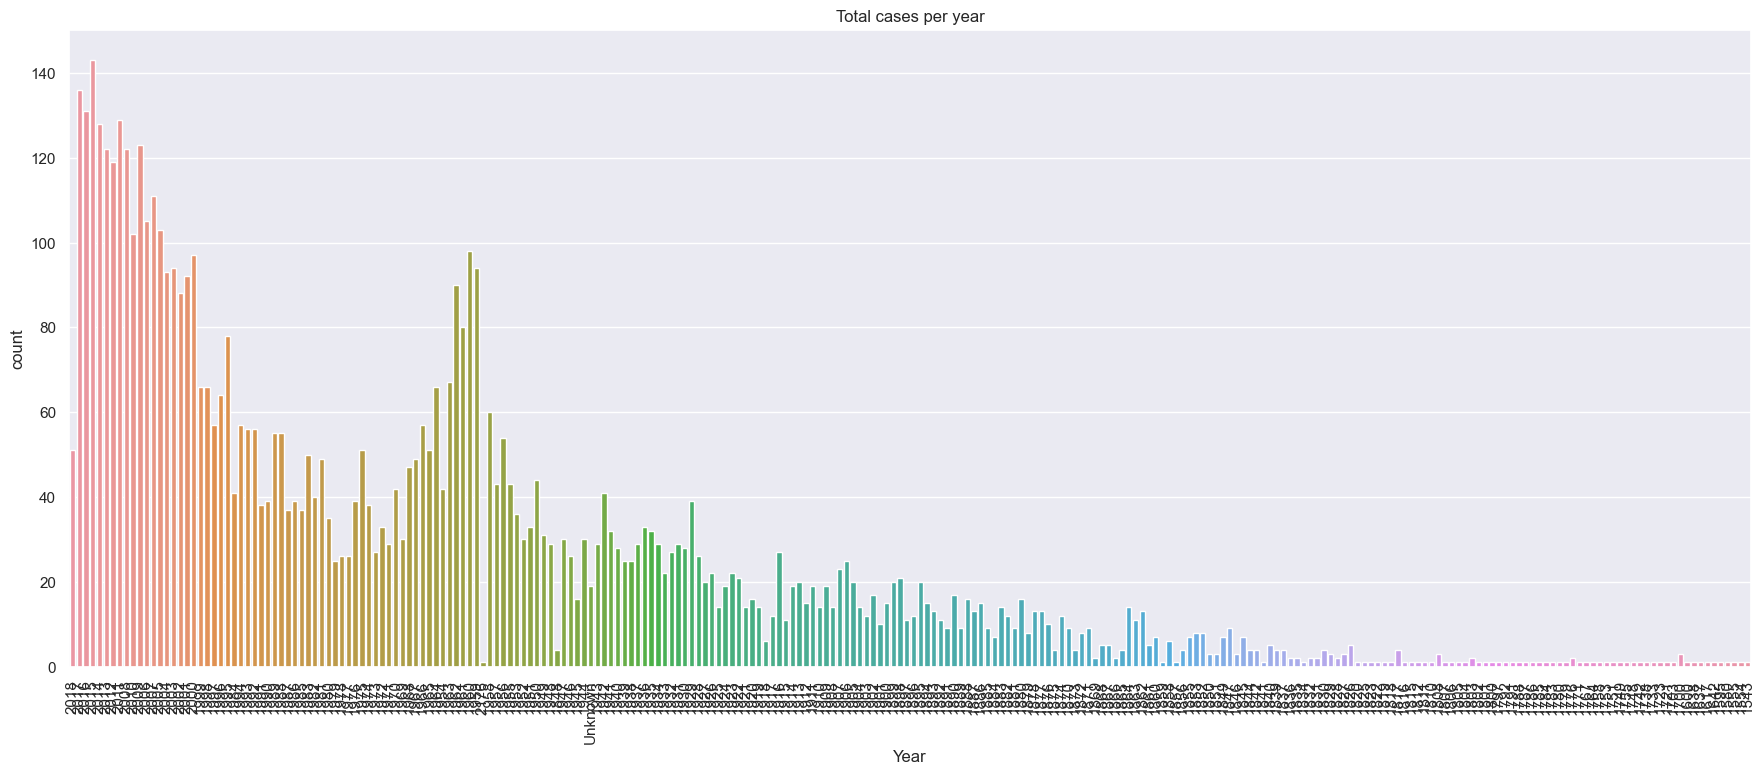

In [17]:
#tamaño del gráfico
sns.set(rc={'figure.figsize':(21.7,8.27)})

#rotar las etiquetas
plt.xticks(rotation=90)

#creación del gráfico
fig_year_full = sns.countplot(x=cleaned_sharks.Year).set(title = "Total cases per year")
plt.show()

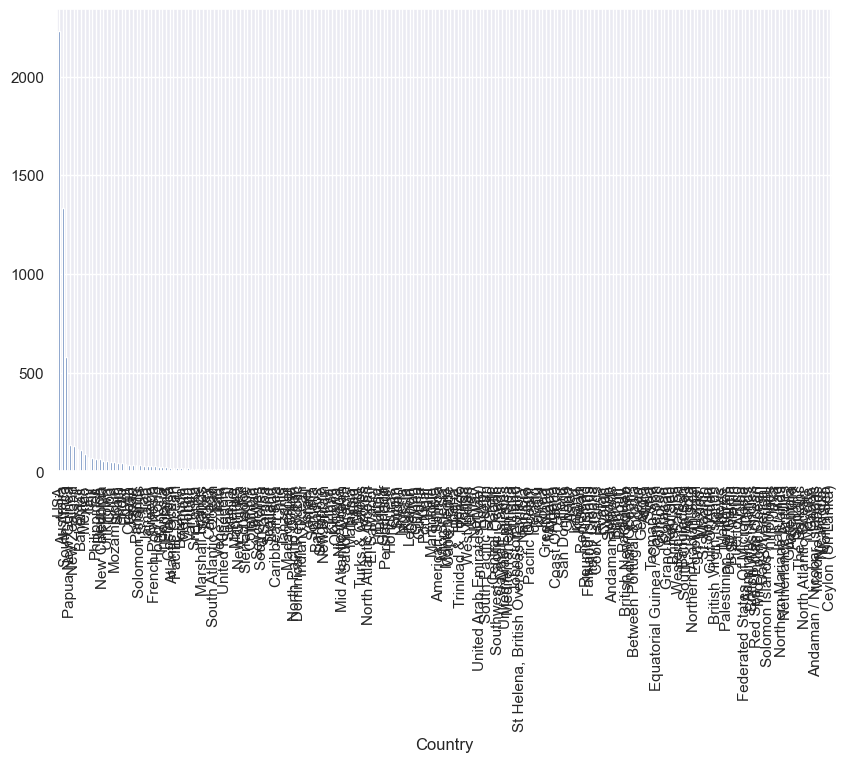

In [18]:
plt.figure(figsize=(10, 6))

cleaned_sharks.Country.value_counts().plot.bar();

Total de casos por Country